In [182]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
#docs = map(lambda x:x.lower(), ['Sky is blue', 'She has five apples', 'MIPT is the best'])
docs = ['Sky is blue', 'She has five apples', 'MIPT is the best']
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model

In [109]:
X = count_model.fit_transform(docs)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
D = Xc.todense() # print out matrix in dense format
print(D)

[[0 0 0 1 1 0 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 1 0 0 1 0]
 [1 0 0 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 1 0 0]
 [0 1 1 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 0 0 1]
 [1 0 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 1 0 0 0]]


In [ ]:
print(count_model.vocabulary_)
dct = count_model.vocabulary_
labels = {v: k for k, v in dct.iteritems()}

In [211]:
dct

{u'apples': 0,
 u'best': 1,
 u'blue': 2,
 u'five': 3,
 u'has': 4,
 u'is': 5,
 u'mipt': 6,
 u'she': 7,
 u'sky': 8,
 u'the': 9}

In [210]:
labels

{0: u'apples',
 1: u'best',
 2: u'blue',
 3: u'five',
 4: u'has',
 5: u'is',
 6: u'mipt',
 7: u'she',
 8: u'sky',
 9: u'the'}

In [128]:
U, s, V = np.linalg.svd(D, full_matrices=True)

In [129]:
s

array([ 3.26180225,  3.        ,  1.60167913,  1.33987689,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [177]:
r = 2

In [178]:
np.max(np.abs(D - (U[:,0:r] * np.diag(s[0:r]) * V[0:r,:])))

0.99590928122244138

In [179]:
s

array([ 3.26180225,  3.        ,  1.60167913,  1.33987689,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

In [183]:
Z = np.diag(s[0:r]) * V[0:r,:]

In [249]:
# Z[0,:],Z[1,:]
x = Z[0, :].T
y = Z[1, :].T
#x = U[:, 0]
#y = U[:, 1]

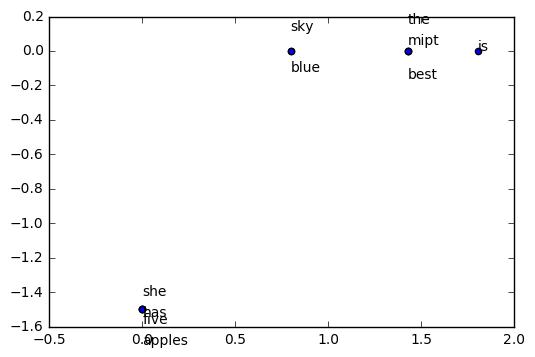

In [250]:
plt.scatter(x, y)
for i in range(n):
    plt.annotate(labels[i], xy = (x[i], y[i]), xytext = (0, (i - n / 2.) * 5), textcoords = 'offset points')

In [248]:
x

matrix([[  0.00000000e+00,   1.42839200e+00,   7.96863753e-01,
           0.00000000e+00,  -1.81066398e-16,   1.80234823e+00,
           1.42839200e+00,  -1.81066398e-16,   7.96863753e-01,
           1.42839200e+00]])